In [133]:
import pandas as pd
import networkx as nx

In [134]:
df = pd.read_excel('../data/Railway Data_JL.xlsx')
df

,train,st_no,st_id,date,arr_time,dep_time,stay_time,mileage,lat,lon
0,1095,1,692,Day 1,19:06:00,19:06:00,-,0,37.860480,112.586820
1,1095,2,1351,Day 1,19:27:00,19:32:00,5,27,37.697190,112.731180
2,1095,3,698,Day 1,19:59:00,20:01:00,2,63,37.421360,112.570320
3,1095,4,944,Day 1,20:31:00,20:35:00,4,108,37.206610,112.168470
4,1095,5,232,Day 1,21:00:00,21:04:00,4,139,37.018470,111.919060
...,...,...,...,...,...,...,...,...,...,...
69633,Z97,1,390,Day 1,13:00:00,13:00:00,-,0,39.896042,116.321152
69634,Z97,2,2175,Day 1,18:41:00,18:47:00,6,707,34.746610,113.659410
69635,Z97,3,1374,Day 1,23:16:00,23:22:00,6,1243,30.528640,114.317010
69636,Z97,4,2265,Day 2,02:35:00,02:41:00,6,1605,28.200063,113.019529


In [135]:
G = nx.MultiDiGraph()
G

In [136]:
st_no_comp = 0
prev_node = 0
prev_mileage = 0
for index, row in df.iterrows():
    if not G.has_node(row["st_id"]):
        G.add_node(row["st_id"], lat=row["lat"], lon=row["lon"])
    if row["st_no"] == st_no_comp: 
        G.add_edge(prev_node, row["st_id"])
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
    else:
        st_no_comp = row["st_no"] + 1
        prev_node = row["st_id"]
        

In [137]:
for node in list(G.nodes):
    print(node, G.out_edges(node))

692 [(692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 1351), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 689), (692, 691), (692, 691), (692, 691), (692, 691), (692, 691), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 226), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1771), (692, 1110), (692, 1110), (692, 1110), (692, 2289), (692, 2289), (692, 2289), (692, 2289), (692, 

In [138]:
G.number_of_nodes()

2719

In [139]:
G.number_of_edges()

64155

In [140]:
SG = G

for edge in list(SG.edges):
    if edge[2] != 0:
        SG.remove_edge(edge[0], edge[1], key=edge[2])

In [141]:
SG.number_of_edges()

10789

In [142]:
SG = SG.to_undirected(reciprocal=False)

In [143]:
for edge in list(SG.edges):
    print(edge)

(692, 1351, 0)
(692, 689, 0)
(692, 691, 0)
(692, 226, 0)
(692, 1771, 0)
(692, 1110, 0)
(692, 2289, 0)
(692, 518, 0)
(692, 1049, 0)
(692, 944, 0)
(692, 109, 0)
(692, 2288, 0)
(1351, 698, 0)
(1351, 1352, 0)
(1351, 1805, 0)
(1351, 691, 0)
(1351, 828, 0)
(1351, 232, 0)
(1351, 944, 0)
(1351, 2267, 0)
(1351, 1944, 0)
(698, 944, 0)
(698, 1805, 0)
(944, 232, 0)
(944, 1805, 0)
(944, 1003, 0)
(232, 1639, 0)
(232, 127, 0)
(232, 1003, 0)
(232, 736, 0)
(232, 2335, 0)
(232, 1512, 0)
(1639, 2335, 0)
(2335, 1512, 0)
(2335, 127, 0)
(2335, 2112, 0)
(1512, 127, 0)
(1512, 2112, 0)
(127, 259, 0)
(127, 2045, 0)
(259, 1835, 0)
(259, 2137, 0)
(259, 105, 0)
(259, 1148, 0)
(259, 2045, 0)
(259, 2274, 0)
(1835, 1480, 0)
(1835, 1148, 0)
(1480, 2362, 0)
(2362, 503, 0)
(503, 1009, 0)
(503, 2361, 0)
(503, 2058, 0)
(1009, 2058, 0)
(1009, 2361, 0)
(1009, 2278, 0)
(1009, 2017, 0)
(1009, 2016, 0)
(1009, 2213, 0)
(2058, 802, 0)
(2058, 1580, 0)
(2058, 413, 0)
(2058, 542, 0)
(2058, 1787, 0)
(2058, 2237, 0)
(2058, 2057, 0)
(

In [144]:
SG.number_of_edges()

6173

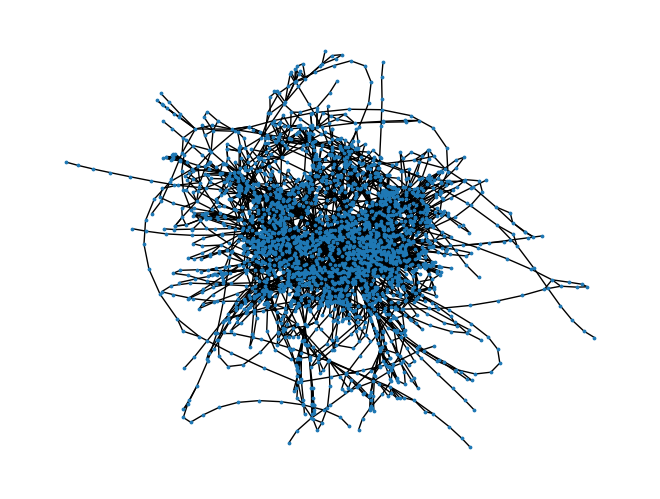

In [106]:
nx.draw(SG,node_size=3)